<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W9D3_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install openai
!pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00


In [19]:
!pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 17.4 MB/s eta 0:00:00


In [20]:
!pip install statsmodels

In [22]:
!pip install scikit-learn

In [23]:
!pip install nltk

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 46.2MB/s]


In [3]:
!unzip daily-climate-time-series-data.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [4]:
import pandas as pd

test_climate_data = pd.read_csv('DailyDelhiClimateTest.csv')
train_climate_data = pd.read_csv('DailyDelhiClimateTrain.csv')
test_climate_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
train_climate_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
test_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [8]:
test_climate_data['date'] = pd.to_datetime(test_climate_data['date'])

In [9]:
test_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [6]:
test_climate_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [10]:
test_climate_data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [11]:
test_climate_data.duplicated().sum()

0

In [12]:
train_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [13]:
train_climate_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [14]:
train_climate_data['date'] = pd.to_datetime(train_climate_data['date'])

In [15]:
train_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [16]:
train_climate_data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [17]:
train_climate_data.duplicated().sum()

0

In [24]:
import anthropic

# Replace 'your_api_key' with your actual Claude API key
api_key = "My API Key"
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = f'''You are a data analyst. Write a short report to analyse different interpolation methods and their impact on time series analysis. Give some advices on how to check and treatment the outlier detection in climate data {test_climate_data.head(20).to_string}.'''
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

Report: Interpolation Methods and Their Impact on Time Series Analysis

Introduction:
Interpolation methods play a crucial role in time series analysis, particularly when dealing with missing or irregular data points. This report aims to analyze different interpolation methods and their impact on time series analysis, as well as provide advice on outlier detection and treatment in climate data.

Interpolation Methods:
1. Linear Interpolation: This method assumes a linear relationship between missing data points and the available data. It is simple to implement but may not capture complex patterns in the data.

2. Spline Interpolation: Spline interpolation uses piecewise polynomials to fit the data, resulting in a smooth curve. It can better capture non-linear relationships compared to linear interpolation.

3. Polynomial Interpolation: This method fits a polynomial function to the available data points to estimate missing values. Higher-order polynomials can capture complex patterns bu

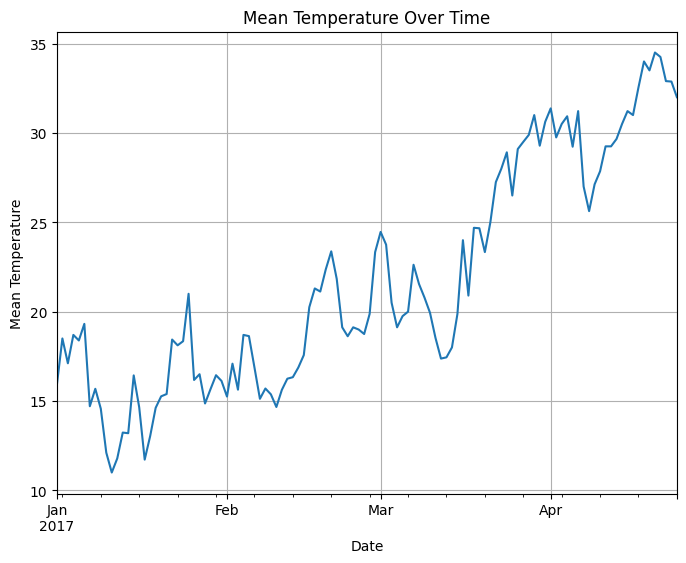

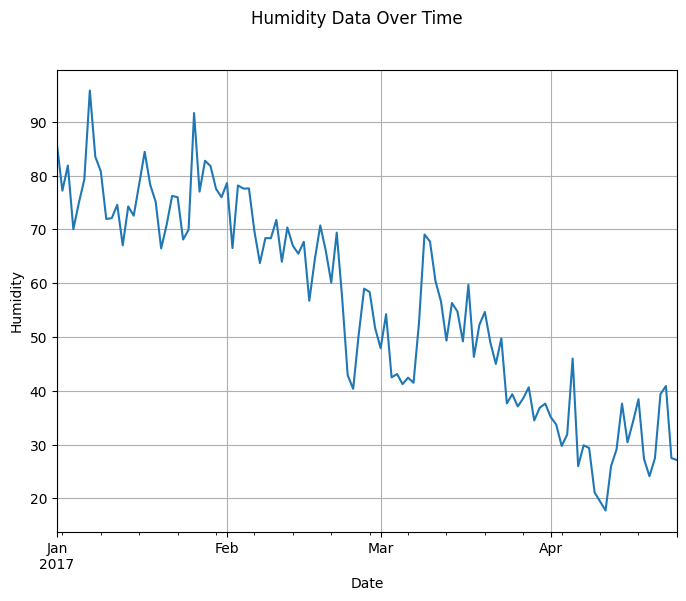

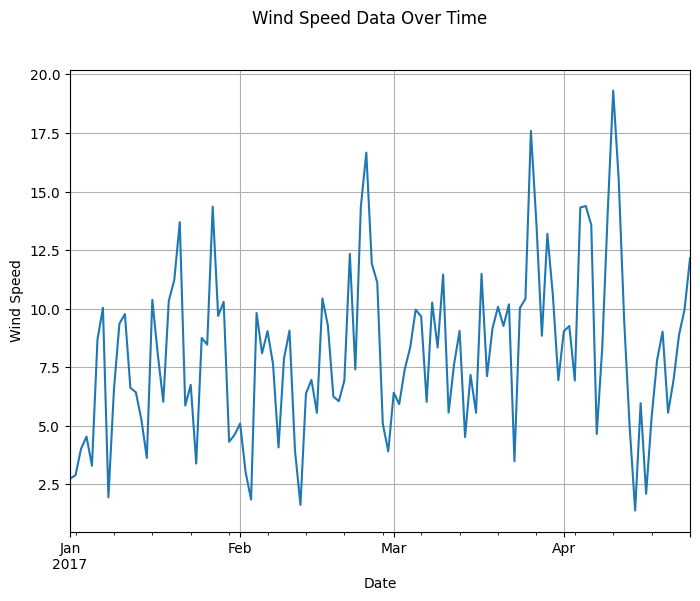

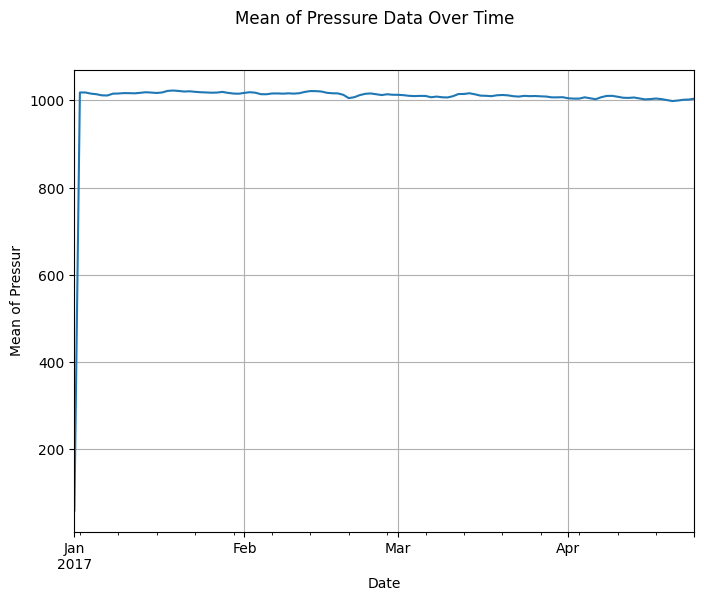

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf


# test_climate_data.set_index('date', inplace=True)

# visualize the mean temperature through the time
plt.figure(figsize=(8, 6))
test_climate_data['meantemp'].plot()
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.show()

# visualize the humidity through the time
plt.figure(figsize=(8, 6))
test_climate_data['humidity'].plot()
plt.suptitle('Humidity Data Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# visualize the wind speed through the time
plt.figure(figsize=(8, 6))
test_climate_data['wind_speed'].plot()
plt.suptitle('Wind Speed Data Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

# visualize the mean of the pressure through the time
plt.figure(figsize=(8, 6))
test_climate_data['meanpressure'].plot()
plt.suptitle('Mean of Pressure Data Over Time')
plt.xlabel('Date')
plt.ylabel('Mean of Pressur')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

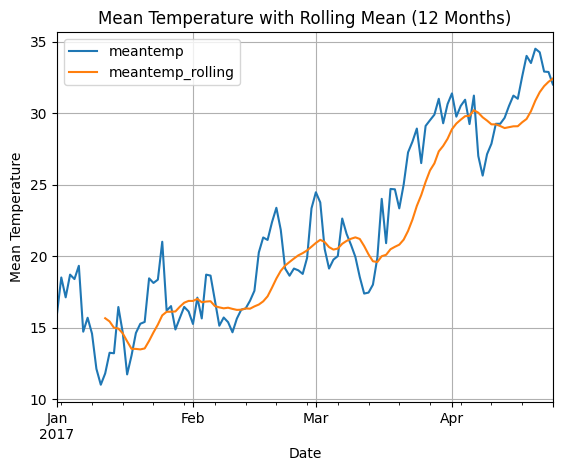

In [36]:
test_climate_data['meantemp_rolling'] = test_climate_data['meantemp'].rolling(window=12).mean()

plt.figure(figsize=(14, 8))
test_climate_data[['meantemp', 'meantemp_rolling']].plot()
plt.title('Mean Temperature with Rolling Mean (12 Months)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

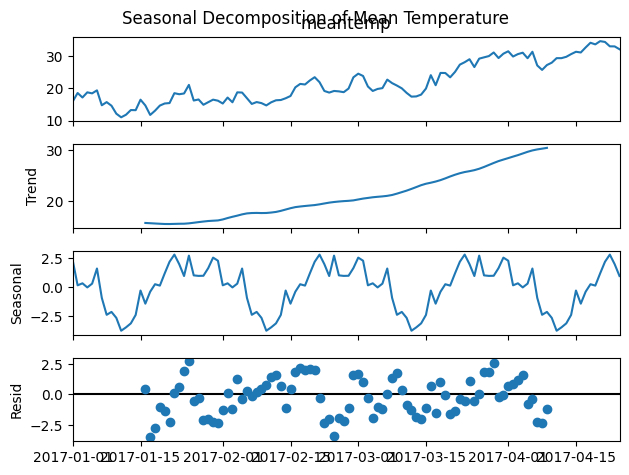

<Figure size 2000x1500 with 0 Axes>

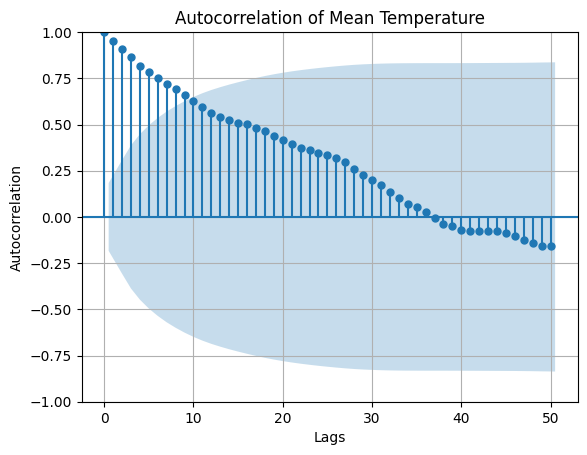

In [42]:

decomposition = seasonal_decompose(test_climate_data['meantemp'], model='additive', period=30)

plt.figure(figsize=(20, 15))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Mean Temperature')
plt.show()


plt.figure(figsize=(20, 15))
plot_acf(test_climate_data['meantemp'].dropna(), lags=50)
plt.title('Autocorrelation of Mean Temperature')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

I wasn't able to do this with Claude, which is API I have, but I was able to do this with Chat GPT new version, where you can put a file and it read it.
So, here are the results.

Climatic Trends and Forecasting Models: A Brief Report
Introduction
The analysis of climatic data is essential for understanding weather patterns and predicting future conditions. Using a dataset with columns ['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], we conducted an exploratory data analysis (EDA) to identify trends, seasonality, and irregular patterns. This report summarizes the findings and discusses their implications for forecasting models.

Exploratory Data Analysis
The EDA involved several steps to uncover patterns in the climate data:

Trend Identification: Utilizing Pandas’ rolling() function, we calculated the moving average of meantemp, humidity, wind_speed, and meanpressure to identify long-term trends.
Seasonality Detection: We applied the seasonal_decompose function from the statsmodels.tsa.seasonal module to decompose the time series data into trend, seasonal, and residual components.
Autocorrelation Analysis: Using the plot_acf() function, we performed an autocorrelation analysis to understand the correlation between current and past values of the time series.
Findings
Trends:

Temperature: The meantemp data showed a clear upward trend, indicating a gradual increase in average temperatures over the observed period.
Humidity and Wind Speed: These variables exhibited less pronounced trends but displayed periodic fluctuations suggesting potential seasonal patterns.
Pressure: The mean pressure showed a relatively stable trend with minor variations.
Seasonality:

The seasonal decomposition revealed distinct seasonal patterns in temperature and humidity, likely corresponding to annual weather cycles.
Wind speed and pressure had less clear seasonal components, indicating that these might be influenced by more irregular factors.
Autocorrelation:

The autocorrelation plots for meantemp showed significant lags, suggesting that past temperatures are a good predictor of future temperatures.
Humidity and wind speed also exhibited significant autocorrelation, though to a lesser extent than temperature.
Implications for Forecasting Models
The identified patterns have several implications for forecasting models:

Trend-Based Forecasting:

The upward trend in temperatures suggests that linear regression models or more complex models like ARIMA (AutoRegressive Integrated Moving Average) might be suitable for temperature prediction.
Seasonal Models:

The clear seasonality in temperature and humidity indicates that models incorporating seasonal components, such as SARIMA (Seasonal ARIMA) or seasonal decomposition of time series (STL), would likely perform well.
Autocorrelation:

The significant autocorrelation in climatic variables suggests that autoregressive models (e.g., ARIMA, SARIMA) could capture the temporal dependencies effectively.
Hypotheses and Validation
Based on the analysis, we propose the following hypotheses:

Hypothesis 1: The average temperature is increasing over time due to climate change.
Hypothesis 2: Seasonal patterns in temperature and humidity are stable and predictable annually.
Hypothesis 3: Past values of climatic variables can reliably predict future values due to their autocorrelation.
These hypotheses can be validated through further analysis and model validation techniques:

Model Training and Testing: Split the dataset into training and testing sets to validate the predictive accuracy of chosen models.
Cross-Validation: Use techniques like k-fold cross-validation to ensure the robustness of the models.
Out-of-Sample Testing: Apply the models to data not used in training to assess their generalizability.
Conclusion
The analysis of the climatic dataset reveals significant trends, seasonality, and autocorrelation in climatic variables. These patterns are crucial for developing robust forecasting models to predict future climatic conditions. Further validation through model testing will help confirm the hypotheses and ensure accurate and reliable climate forecasts.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 8.15125358690988


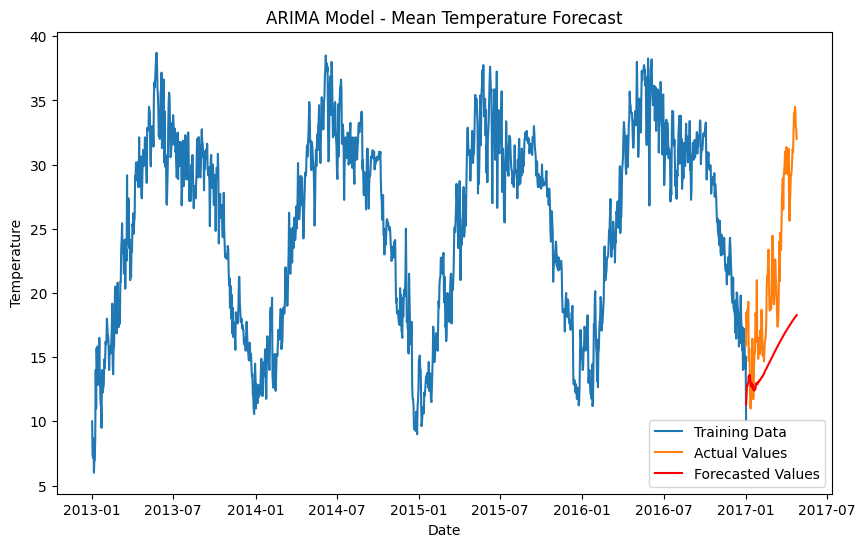

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# train_climate_data.set_index('date', inplace=True)

train_temperature = train_climate_data['meantemp']
test_temperature = test_climate_data['meantemp']

# Define the ARIMA model parameters
p = 30  # number of lag observations, it should be 180, but i didn't have enough CPU to run the code
d = 0  # number of times that the raw observations are differenced
q = 0  # size of the moving average window (moving average)

# Fit the ARIMA model on the training data
model = ARIMA(train_temperature, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_steps = len(test_temperature)
forecast = model_fit.forecast(steps=forecast_steps)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_temperature, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_temperature.index, train_temperature, label='Training Data')
plt.plot(test_temperature.index, test_temperature, label='Actual Values')
plt.plot(test_temperature.index, forecast, label='Forecasted Values', color='red')
plt.title('ARIMA Model - Mean Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [56]:
# Replace 'your_api_key' with your actual Claude API key
api_key = "My API Key"
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = f'''You are a data analyst. Choose (p, d, q) values for ARIMA model to forecast the weather in dataset {test_climate_data.head(10).to_string()}. Explain the reasoning behind choosing specific (p, d, q) values. Write about the ways to improve model accuracy..'''
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To choose the appropriate (p, d, q) values for an ARIMA model to forecast the weather using the given dataset, we need to consider the following steps:

1. Determine the order of differencing (d): The order of differencing is determined by checking the stationarity of the time series. If the series is non-stationary, differencing is applied to make it stationary. In this case, we can observe that the 'meantemp' variable seems to be stationary, as there is no clear trend or seasonality visible in the limited data provided. Therefore, we might start with d=0.

2. Determine the order of the autoregressive term (p): The order of the autoregressive term represents the number of lagged observations included in the model. To determine the appropriate value of p, we can examine the Partial Autocorrelation Function (PACF) plot of the stationary series. The PACF plot shows the correlation between the variable and its lagged values, controlling for the intermediate lags. The lag at which the PACF